In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
tn_gross = pd.read_csv("./tngross.csv")
tn_production = pd.read_csv("./tnproduction.csv")

In [3]:
tn_gross

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
2,2,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817"
4,4,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,044,540,523"
...,...,...,...,...,...,...
6095,6095,"Mar 17, 2015",Closure,"$100,000",$0,$0
6096,6096,"Aug 29, 2015",Lunch Time Heroes,"$100,000",$0,$0
6097,6097,"Mar 25, 2015",Open Secret,"$100,000",$0,$0
6098,6098,"Nov 10, 2015",The Night Visitor,"$100,000",$0,$0


In [4]:
tn_production

,Unnamed: 0,runtime_minutes,genres,production_company,production_country
0,0,181 minutes,Action,Marvel Studios,United States
1,1,136 minutes,Adventure,Walt Disney Pictures,United States
2,2,141 minutes,Action,Marvel Studios,United States
3,3,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States
4,4,156 minutes,Action,Marvel Studios,United States
...,...,...,...,...,...
6095,6095,90 minutes,Drama,None,United States
6096,6096,88 minutes,Adventure,Phebean Films,Nigeria
6097,6097,None,Documentary,None,United States
6098,6098,None,Horror,None,United States


In [5]:
df = tn_gross.merge(tn_production, on="Unnamed: 0")
df

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564",181 minutes,Action,Marvel Studios,United States
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",136 minutes,Adventure,Walt Disney Pictures,United States
2,2,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979",141 minutes,Action,Marvel Studios,United States
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817",136 minutes,Adventure,"Lucasfilm, Bad Robot",United States
4,4,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,044,540,523",156 minutes,Action,Marvel Studios,United States
...,...,...,...,...,...,...,...,...,...,...
6095,6095,"Mar 17, 2015",Closure,"$100,000",$0,$0,90 minutes,Drama,None,United States
6096,6096,"Aug 29, 2015",Lunch Time Heroes,"$100,000",$0,$0,88 minutes,Adventure,Phebean Films,Nigeria
6097,6097,"Mar 25, 2015",Open Secret,"$100,000",$0,$0,None,Documentary,None,United States
6098,6098,"Nov 10, 2015",The Night Visitor,"$100,000",$0,$0,None,Horror,None,United States


In [6]:
df["worldwide_gross"] = df["worldwide_gross"].str.replace('$', '')
df["domestic_gross"] = df["domestic_gross"].str.replace('$', '')
df["production_budget"] = df["production_budget"].str.replace('$', '')
df["worldwide_gross"] = df["worldwide_gross"].str.replace(',', '')
df["domestic_gross"] = df["domestic_gross"].str.replace(',', '')
df["production_budget"] = df["production_budget"].str.replace(',', '')
df["production_budget"]= df["production_budget"].astype(float)
df["domestic_gross"]= df["domestic_gross"].astype(float)
df["worldwide_gross"]= df["worldwide_gross"].astype(float)

In [7]:
df['s_movie_ratio'] = df['worldwide_gross'] / df['production_budget']
df

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,s_movie_ratio
0,0,"Apr 23, 2019",Avengers: Endgame,400000000.0,858373000.0,2.797801e+09,181 minutes,Action,Marvel Studios,United States,6.994501
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000.0,241071802.0,1.045714e+09,136 minutes,Adventure,Walt Disney Pictures,United States,2.759139
2,2,"Apr 22, 2015",Avengers: Age of Ultron,365000000.0,459005868.0,1.395317e+09,141 minutes,Action,Marvel Studios,United States,3.822786
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.064616e+09,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States,6.747111
4,4,"Apr 25, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.044541e+09,156 minutes,Action,Marvel Studios,United States,6.815135
...,...,...,...,...,...,...,...,...,...,...,...
6095,6095,"Mar 17, 2015",Closure,100000.0,0.0,0.000000e+00,90 minutes,Drama,None,United States,0.000000
6096,6096,"Aug 29, 2015",Lunch Time Heroes,100000.0,0.0,0.000000e+00,88 minutes,Adventure,Phebean Films,Nigeria,0.000000
6097,6097,"Mar 25, 2015",Open Secret,100000.0,0.0,0.000000e+00,None,Documentary,None,United States,0.000000
6098,6098,"Nov 10, 2015",The Night Visitor,100000.0,0.0,0.000000e+00,None,Horror,None,United States,0.000000


In [ ]:
#s_movies_df = df.loc[df['s_movie_ratio'] >= 1.7]
#s_movies_df

In [8]:
genres_df = df
genres_df = genres_df[genres_df.genres != "None"]
genres_df

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,s_movie_ratio
0,0,"Apr 23, 2019",Avengers: Endgame,400000000.0,858373000.0,2.797801e+09,181 minutes,Action,Marvel Studios,United States,6.994501
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000.0,241071802.0,1.045714e+09,136 minutes,Adventure,Walt Disney Pictures,United States,2.759139
2,2,"Apr 22, 2015",Avengers: Age of Ultron,365000000.0,459005868.0,1.395317e+09,141 minutes,Action,Marvel Studios,United States,3.822786
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.064616e+09,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States,6.747111
4,4,"Apr 25, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.044541e+09,156 minutes,Action,Marvel Studios,United States,6.815135
...,...,...,...,...,...,...,...,...,...,...,...
6095,6095,"Mar 17, 2015",Closure,100000.0,0.0,0.000000e+00,90 minutes,Drama,None,United States,0.000000
6096,6096,"Aug 29, 2015",Lunch Time Heroes,100000.0,0.0,0.000000e+00,88 minutes,Adventure,Phebean Films,Nigeria,0.000000
6097,6097,"Mar 25, 2015",Open Secret,100000.0,0.0,0.000000e+00,None,Documentary,None,United States,0.000000
6098,6098,"Nov 10, 2015",The Night Visitor,100000.0,0.0,0.000000e+00,None,Horror,None,United States,0.000000


In [9]:
# Movies that broke even + >
be_movies = genres_df.loc[df['s_movie_ratio'] >= 1]
be_movies

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,s_movie_ratio
0,0,"Apr 23, 2019",Avengers: Endgame,400000000.0,858373000.0,2.797801e+09,181 minutes,Action,Marvel Studios,United States,6.994501
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000.0,241071802.0,1.045714e+09,136 minutes,Adventure,Walt Disney Pictures,United States,2.759139
2,2,"Apr 22, 2015",Avengers: Age of Ultron,365000000.0,459005868.0,1.395317e+09,141 minutes,Action,Marvel Studios,United States,3.822786
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.064616e+09,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States,6.747111
4,4,"Apr 25, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.044541e+09,156 minutes,Action,Marvel Studios,United States,6.815135
...,...,...,...,...,...,...,...,...,...,...,...
6082,6082,1977,Eraserhead,100000.0,7000000.0,7.097971e+06,89 minutes,Horror,None,United States,70.979710
6085,6085,"Oct 9, 1998",The Mighty,100000.0,2652246.0,6.121582e+06,None,Drama,None,United States,61.215820
6086,6086,"Jul 7, 2017",A Ghost Story,100000.0,1594798.0,2.769782e+06,93 minutes,Drama,"Sailor Bear, Zero Trans Fat Productions, Ideam...",United States,27.697820
6087,6087,"May 10, 1980",Penitentiary,100000.0,287000.0,2.870000e+05,None,Drama,None,United States,2.870000


''

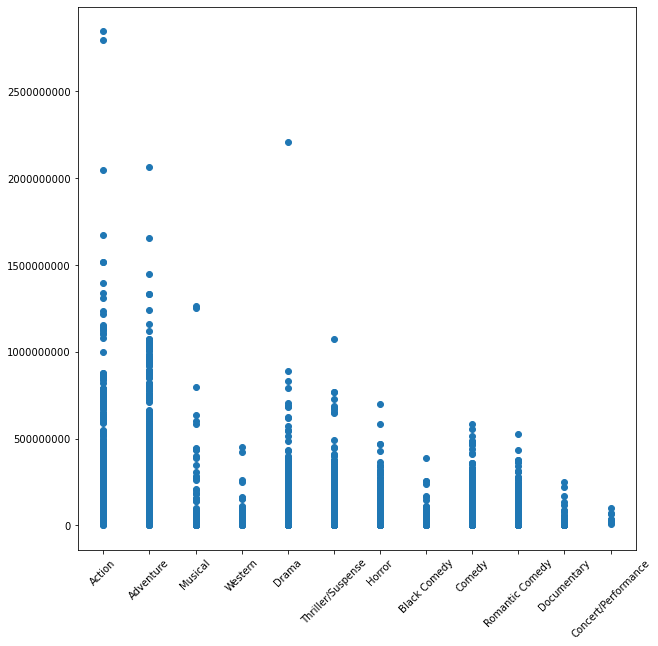

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(
    x=be_movies["genres"], 
    y=be_movies["worldwide_gross"], 
)
plt.xticks(rotation=45)
plt.ticklabel_format(axis="y", style="plain")
;

''

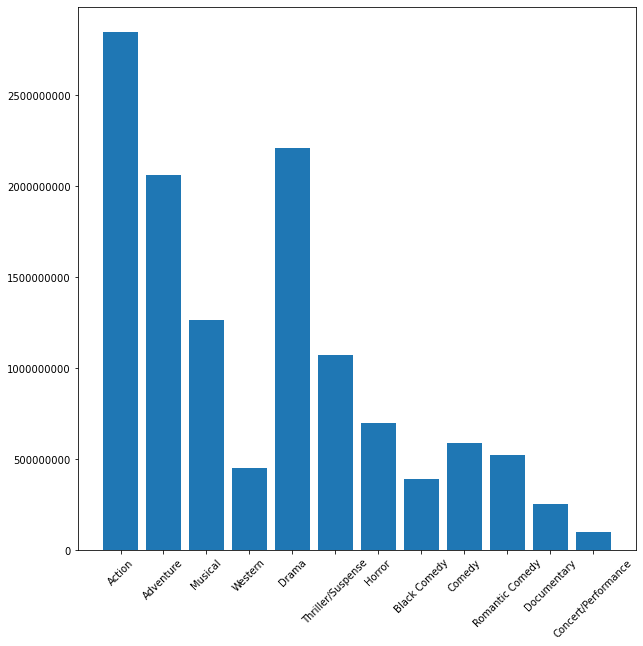

In [16]:
plt.figure(figsize=(10, 10))
plt.bar(
    x=be_movies["genres"], 
    height=be_movies["worldwide_gross"])
plt.xticks(rotation=45)
plt.ticklabel_format(axis="y", style="plain")
;

''

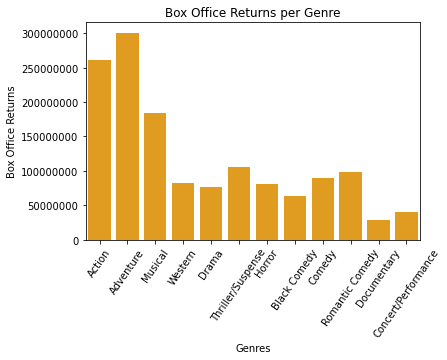

In [43]:
sns.barplot(
    x=be_movies["genres"], 
    y=be_movies["worldwide_gross"],
    color="orange",
    ci=None)
plt.title("Box Office Returns per Genre")
plt.xlabel("Genres")
plt.ylabel("Box Office Returns")
plt.xticks(rotation=55)
plt.ticklabel_format(axis="y", style="plain")
sns.color_palette("Spectral", as_cmap=True)
#flatui = ["F34F1C","7FBC00","FFBA01","01A6F0","747474"]
#sns.set_palette(flatui)
;

In [13]:
# Movies that did not break even
dn_movies = genres_df.loc[df['s_movie_ratio'] < 1]
dn_movies

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,s_movie_ratio
72,72,"Feb 28, 2020",Onward,200000000.0,61555145.0,133317030.0,114 minutes,Adventure,"Walt Disney Pictures, Disney-Pixar",United States,0.666585
73,73,"Dec 16, 2020",Wonder Woman 1984,200000000.0,46586274.0,166145470.0,151 minutes,Action,"Atlas Entertainment, Stone Quarry, Warner Bros.",United States,0.830727
74,74,"Sep 4, 2020",Mulan,200000000.0,0.0,69965374.0,115 minutes,Adventure,"Walt Disney Pictures, Benderspink Productions","China, United States",0.349827
94,94,"Jul 28, 2021",The Suicide Squad,185000000.0,55800219.0,167250021.0,132 minutes,Action,"Warner Bros., Atlas Entertainment",United States,0.904054
123,123,"Jun 22, 2007",Evan Almighty,175000000.0,100289690.0,174131329.0,96 minutes,Comedy,"Relativity Media, Spyglass Entertainment",United States,0.995036
...,...,...,...,...,...,...,...,...,...,...,...
6095,6095,"Mar 17, 2015",Closure,100000.0,0.0,0.0,90 minutes,Drama,None,United States,0.000000
6096,6096,"Aug 29, 2015",Lunch Time Heroes,100000.0,0.0,0.0,88 minutes,Adventure,Phebean Films,Nigeria,0.000000
6097,6097,"Mar 25, 2015",Open Secret,100000.0,0.0,0.0,None,Documentary,None,United States,0.000000
6098,6098,"Nov 10, 2015",The Night Visitor,100000.0,0.0,0.0,None,Horror,None,United States,0.000000


''

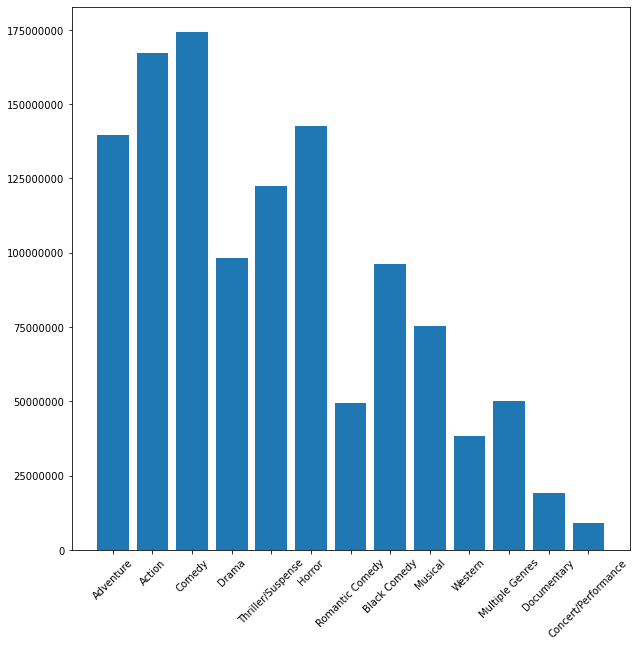

In [17]:
plt.figure(figsize=(10, 10))
plt.bar(
    x=dn_movies["genres"], 
    height=dn_movies["worldwide_gross"])
plt.xticks(rotation=45)
plt.ticklabel_format(axis="y", style="plain")
;

''

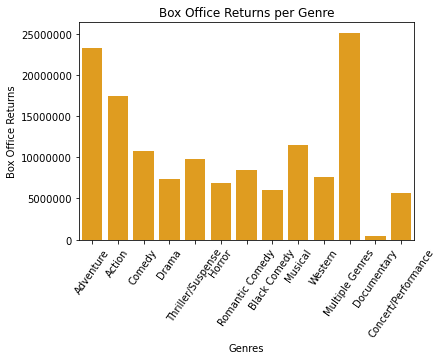

In [44]:
sns.barplot(
    x=dn_movies["genres"], 
    y=dn_movies["worldwide_gross"],
    color="orange",
    ci=None)
plt.title("Box Office Returns per Genre")
plt.xlabel("Genres")
plt.ylabel("Box Office Returns")
plt.xticks(rotation=55)
plt.ticklabel_format(axis="y", style="plain")
sns.color_palette("Spectral", as_cmap=True)
#flatui = ["F34F1C","7FBC00","FFBA01","01A6F0","747474"]
#sns.set_palette(flatui)
;